In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import seaborn as sns
import requests
#imports

# Preprocessing

In [183]:
df = pd.read_csv('../../data/complete.csv')
df.head()

,track_title,artist_name,track_id,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
0,Red Planet - Red Planet Radio,Joe,3FeufAV1f6fajILIQuAXMw,256080,0.96800,7,0,4,0.02150,0.698,0.862000,0.1110,-11.012,0.0337,0.3900,136.884,0
1,Red Planet - Red Planet Extended,Joe,2o7oYjZuo3S2QitY4R5dII,395442,0.97000,2,1,4,0.00339,0.724,0.896000,0.1060,-8.415,0.0358,0.4320,136.868,0
2,Basejump,Robin Schulz,6nWoNNkfffbmHU9z3kGPao,391680,0.40600,5,0,4,0.00433,0.803,0.825000,0.0948,-9.444,0.0608,0.0769,125.014,0
3,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,5Zg1UOcmee5oiRw3gbXna0,347840,0.00267,7,0,5,0.91000,0.150,0.028700,0.1250,-24.701,0.0434,0.1050,135.652,0
4,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,2ZWmWGoZS2OTGZSnMhck7Q,181733,0.22600,7,1,4,0.76800,0.290,0.000002,0.1050,-14.990,0.0385,0.4700,98.348,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34740 entries, 0 to 34739
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_title       34739 non-null  object 
 1   artist_name       34739 non-null  object 
 2   track_id          34740 non-null  object 
 3   duration_ms       34740 non-null  int64  
 4   energy            34740 non-null  float64
 5   key               34740 non-null  int64  
 6   mode              34740 non-null  int64  
 7   time_signature    34740 non-null  int64  
 8   acousticness      34740 non-null  float64
 9   danceability      34740 non-null  float64
 10  instrumentalness  34740 non-null  float64
 11  liveness          34740 non-null  float64
 12  loudness          34740 non-null  float64
 13  speechiness       34740 non-null  float64
 14  valence           34740 non-null  float64
 15  tempo             34740 non-null  float64
 16  On_chart          34740 non-null  int64 

In [4]:
corrMatrix = df.corr()
#looking at correlations

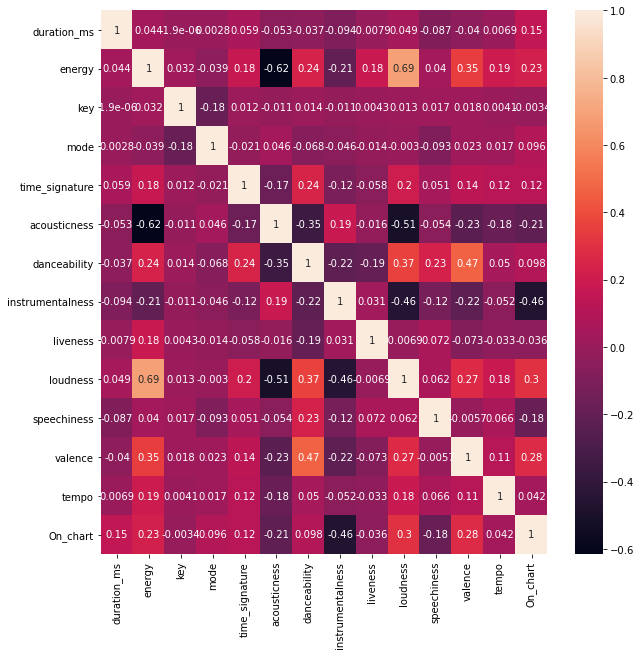

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()
#heatmap to visulize

In [6]:
df = df.dropna()
#getting rid of the few nulls we have

In [7]:
df.info()
#making sure theyre gone

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34739 entries, 0 to 34739
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_title       34739 non-null  object 
 1   artist_name       34739 non-null  object 
 2   track_id          34739 non-null  object 
 3   duration_ms       34739 non-null  int64  
 4   energy            34739 non-null  float64
 5   key               34739 non-null  int64  
 6   mode              34739 non-null  int64  
 7   time_signature    34739 non-null  int64  
 8   acousticness      34739 non-null  float64
 9   danceability      34739 non-null  float64
 10  instrumentalness  34739 non-null  float64
 11  liveness          34739 non-null  float64
 12  loudness          34739 non-null  float64
 13  speechiness       34739 non-null  float64
 14  valence           34739 non-null  float64
 15  tempo             34739 non-null  float64
 16  On_chart          34739 non-null  int64 

In [8]:
target = df['On_chart']
data = df.drop(['On_chart', 'track_title', 'artist_name', 'track_id'], axis=1)
#dropped these columns because they are not important to the business problem 


In [9]:
data.dtypes
#making sure there arent any categorical we need to deal with

duration_ms           int64
energy              float64
key                   int64
mode                  int64
time_signature        int64
acousticness        float64
danceability        float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
dtype: object

In [10]:
data_train, data_test, target_train, target_test = train_test_split(data, target)
#train test split for the first time

In [11]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)
#first try on decision tree

DecisionTreeClassifier(max_depth=5)

In [12]:
tree_clf.feature_importances_
#checking feature importances

array([0.14711319, 0.00216905, 0.        , 0.        , 0.        ,
       0.05386095, 0.00075313, 0.55295178, 0.        , 0.04089346,
       0.14944595, 0.05281249, 0.        ])

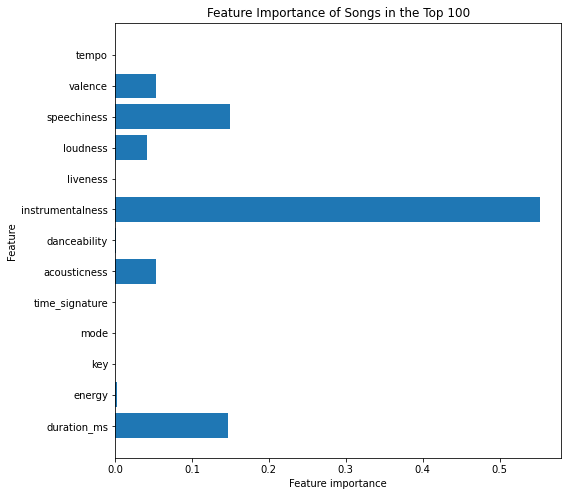

In [299]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    
    plt.figure(figsize=(8,8))
    plt.barh(data_train.columns.values, model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [14]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[2714 1608]
 [ 385 3978]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73      4322
           1       0.71      0.91      0.80      4363

    accuracy                           0.77      8685
   macro avg       0.79      0.77      0.77      8685
weighted avg       0.79      0.77      0.77      8685



In [15]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 77.05%


In [16]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [17]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

In [18]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.7834497581945191

In [19]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.7778929188255613

In [20]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [21]:
# Training accuracy score
forest.score(data_train, target_train)

0.782451830812927

In [22]:
# Test accuracy score
forest.score(data_test, target_test)

0.7759355210132413

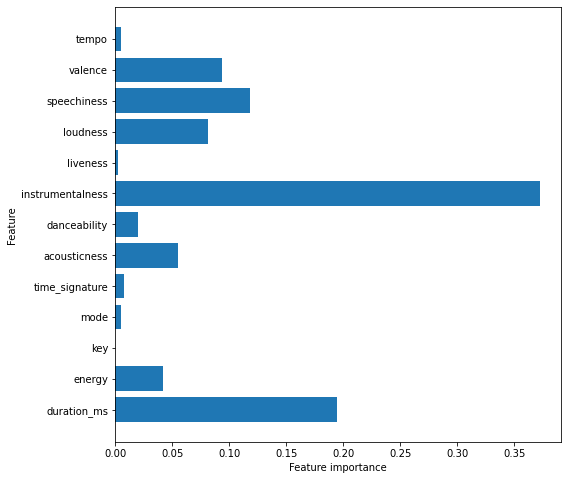

In [23]:
plot_feature_importances(forest)

In [24]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [301]:
y = df['On_chart']
X = df.drop(['On_chart', 'track_title', 'artist_name', 'track_id'], axis=1)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [303]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 90.54%
Validation accuracy: 81.26%


In [304]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [305]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 88.64%
Validation accuracy: 81.22%


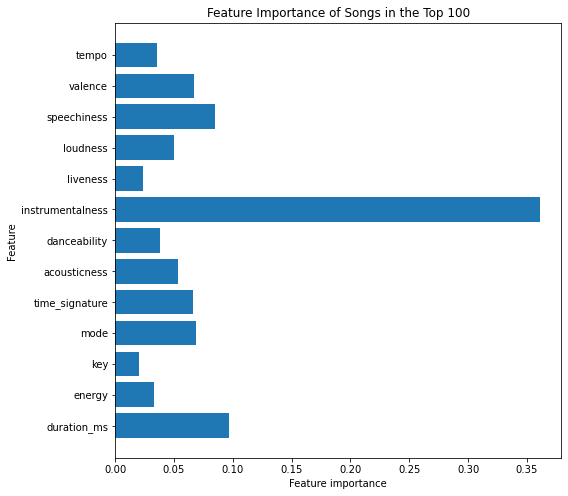

In [306]:
plot_feature_importances(clf)

unsupervised clusters model

group on popularity

if good clusters

go into clusters and see whats in common

more upbeat higher tempos what feautes?

use as intro

did some clustering w this data set

we found that wxzy determine if popular or not

used that info to go ahead and use another dataset to build a network to show if a song would be a hit or not 

In [32]:
artist = pd.read_csv('../../data/artists.csv')
artist

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [33]:
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [34]:
data_by_artist = pd.read_csv('../../data/data_by_artist_o.csv')
data_by_artist.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [35]:
data_by_artist.info()
#group by genre?
#do some clustering to see what popularity songs are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [36]:
data_by_genres = pd.read_csv('../../data/data_by_genres_o.csv')
data_by_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [37]:
data_by_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [38]:
data_by_year = pd.read_csv('../../data/data_by_year_o.csv')
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [39]:
data_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [40]:
data = pd.read_csv('../../data/data_o.csv')
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [42]:
tracks = pd.read_csv('../../data/tracks.csv')
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [43]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [44]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])
# X = data_by_artist.select_dtypes(np.number)
# cluster_pipeline.fit(X)
# data_by_artist['cluster'] = cluster_pipeline.predict(X)

In [45]:
# from sklearn.manifold import TSNE
# import plotly.express as px
# tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
# genre_embedding = tsne_pipeline.fit_transform(X)
# projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
# projection['popularity'] = data_by_artist['popularity']
# projection['cluster'] = data_by_artist['cluster']
# fig = px.scatter(
#     projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'popularity'])
# fig.show()

# Neural Nets

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34739 entries, 0 to 34739
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_title       34739 non-null  object 
 1   artist_name       34739 non-null  object 
 2   track_id          34739 non-null  object 
 3   duration_ms       34739 non-null  int64  
 4   energy            34739 non-null  float64
 5   key               34739 non-null  int64  
 6   mode              34739 non-null  int64  
 7   time_signature    34739 non-null  int64  
 8   acousticness      34739 non-null  float64
 9   danceability      34739 non-null  float64
 10  instrumentalness  34739 non-null  float64
 11  liveness          34739 non-null  float64
 12  loudness          34739 non-null  float64
 13  speechiness       34739 non-null  float64
 14  valence           34739 non-null  float64
 15  tempo             34739 non-null  float64
 16  On_chart          34739 non-null  int64 

In [67]:
clean_df = df.drop(['track_title', 'artist_name', 'track_id'], axis=1)
clean_df.head()

,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
0,256080,0.96800,7,0,4,0.02150,0.698,0.862000,0.1110,-11.012,0.0337,0.3900,136.884,0
1,395442,0.97000,2,1,4,0.00339,0.724,0.896000,0.1060,-8.415,0.0358,0.4320,136.868,0
2,391680,0.40600,5,0,4,0.00433,0.803,0.825000,0.0948,-9.444,0.0608,0.0769,125.014,0
3,347840,0.00267,7,0,5,0.91000,0.150,0.028700,0.1250,-24.701,0.0434,0.1050,135.652,0
4,181733,0.22600,7,1,4,0.76800,0.290,0.000002,0.1050,-14.990,0.0385,0.4700,98.348,0


In [68]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34739 entries, 0 to 34739
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       34739 non-null  int64  
 1   energy            34739 non-null  float64
 2   key               34739 non-null  int64  
 3   mode              34739 non-null  int64  
 4   time_signature    34739 non-null  int64  
 5   acousticness      34739 non-null  float64
 6   danceability      34739 non-null  float64
 7   instrumentalness  34739 non-null  float64
 8   liveness          34739 non-null  float64
 9   loudness          34739 non-null  float64
 10  speechiness       34739 non-null  float64
 11  valence           34739 non-null  float64
 12  tempo             34739 non-null  float64
 13  On_chart          34739 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 5.2 MB


In [82]:
from sklearn.model_selection import train_test_split
X = clean_df.drop('On_chart', axis=1)
y = clean_df['On_chart']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [83]:
scaler = StandardScaler()

In [84]:
scaled_data = scaler.fit_transform(X_train, y_train)

In [92]:
model_1 = Sequential()
model_1.add(Dense(5, activation='tanh', input_shape=(13,)))
model_1.add(Dense(1, activation='sigmoid'))

In [93]:
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [97]:
results_1 = model_1.fit(scaled_data, y_train, epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
20843/20843 [==============================] - 14s 655us/step - loss: 0.4807 - acc: 0.7685 - val_loss: 0.4675 - val_acc: 0.77978 - acc: 0.
Epoch 2/25
20843/20843 [==============================] - 14s 690us/step - loss: 0.4566 - acc: 0.7856 - val_loss: 0.4605 - val_acc: 0.78167 - ETA - ETA: 0s - loss: 0.4561 - 
Epoch 3/25
20843/20843 [==============================] - 13s 637us/step - loss: 0.4483 - acc: 0.7887 - val_loss: 0.4556 - val_acc: 0.7858loss: 0.4474 - acc: 0.786 - ETA: 5s - loss - ETA: 0s - loss: 0.4487 - acc
Epoch 4/25
20843/20843 [==============================] - 15s 700us/step - loss: 0.4460 - acc: 0.7932 - val_loss: 0.4587 - val_acc: 0.7818
Epoch 5/25
20843/20843 [==============================] - 14s 659us/step - loss: 0.4441 - acc: 0.7906 - val_loss: 0.4543 - val_acc: 0.7835
Epoch 6/25
20843/20843 [==============================] - 14s 690us/step - loss: 0.4433 - acc: 0.7910 - val_loss: 0.4545 - val_acc: 0.7837- loss - ETA: 1s - loss: 0.4429 -  - ETA: 0s - l

In [95]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

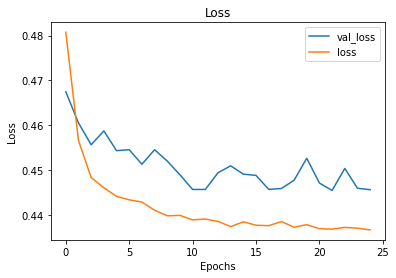

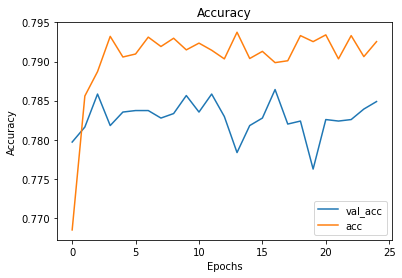

In [98]:
visualize_training_results(results_1)

In [102]:
model_2 = Sequential()
model_2.add(Dense(10, activation='tanh', input_shape=(13,)))
model_2.add(Dense(5, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [103]:
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [104]:
results_2 = model_2.fit(scaled_data, y_train, epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
20843/20843 [==============================] - 14s 665us/step - loss: 0.4692 - acc: 0.7773 - val_loss: 0.4535 - val_acc: 0.7879
Epoch 2/25
20843/20843 [==============================] - 15s 711us/step - loss: 0.4441 - acc: 0.7919 - val_loss: 0.4409 - val_acc: 0.7903
Epoch 3/25
20843/20843 [==============================] - 14s 659us/step - loss: 0.4391 - acc: 0.7899 - val_loss: 0.4413 - val_acc: 0.7918
Epoch 4/25
20843/20843 [==============================] - 14s 667us/step - loss: 0.4357 - acc: 0.7936 - val_loss: 0.4432 - val_acc: 0.7845lo
Epoch 5/25
20843/20843 [==============================] - 14s 663us/step - loss: 0.4336 - acc: 0.7944 - val_loss: 0.4440 - val_acc: 0.7874A: 4s - loss: 0.4339 - acc:  - ETA: 2s - los - ETA: 0s - loss: 0.
Epoch 6/25
20843/20843 [==============================] - 14s 669us/step - loss: 0.4325 - acc: 0.7933 - val_loss: 0.4461 - val_acc: 0.7870oss: 0.4310 - a - ETA: 3s  - ETA: 1s - loss: 0.4320  - ETA: 1s - loss: 0.4314 - acc: 0 - ETA: 1s - l

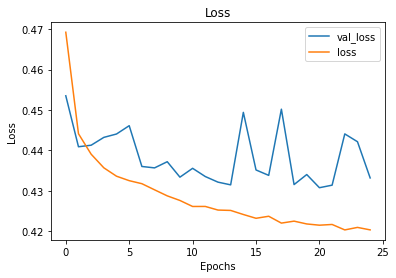

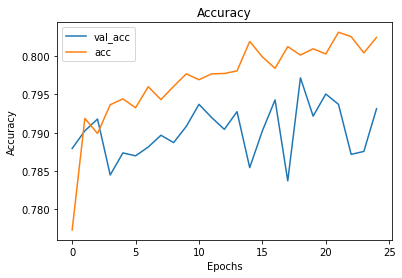

In [105]:
visualize_training_results(results_2)

# K Means Clustering

In [106]:
data_by_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [108]:
dropped_dba = data_by_artist.drop(['genres', 'artists'], axis=1)
dropped_dba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      28680 non-null  float64
 1   danceability      28680 non-null  float64
 2   duration_ms       28680 non-null  float64
 3   energy            28680 non-null  float64
 4   instrumentalness  28680 non-null  float64
 5   liveness          28680 non-null  float64
 6   loudness          28680 non-null  float64
 7   speechiness       28680 non-null  float64
 8   tempo             28680 non-null  float64
 9   valence           28680 non-null  float64
 10  popularity        28680 non-null  float64
 11  key               28680 non-null  int64  
 12  mode              28680 non-null  int64  
 13  count             28680 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 3.1 MB


In [112]:
dropped_dba.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [109]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3) 
k_means.fit(dropped_dba) 
cluster_assignments = k_means.predict(dropped_dba) 

In [110]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(dropped_dba, cluster_assignments))

25220.277943264737


In [114]:
k_means_3 = KMeans(n_clusters=3).fit(dropped_dba)
k_means_4 = KMeans(n_clusters=4).fit(dropped_dba)
k_means_5 = KMeans(n_clusters=5).fit(dropped_dba)
k_means_6 = KMeans(n_clusters=6).fit(dropped_dba)
k_means_7 = KMeans(n_clusters=7).fit(dropped_dba)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [115]:
CH_score = []

for model in k_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(dropped_dba, labels))

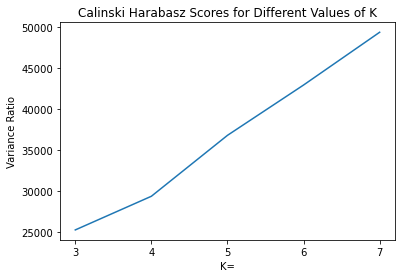

In [116]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [117]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

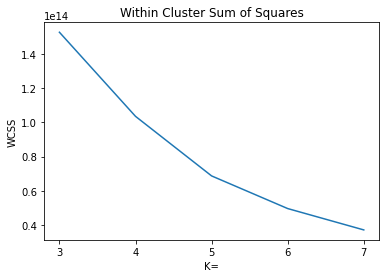

In [118]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

# More NN

In [119]:
model_3 = Sequential()
model_3.add(Dense(10, activation='relu', input_shape=(13,)))
model_3.add(Dense(5, activation='relu'))
model_3.add(Dense(1, activation='relu'))

In [120]:
model_3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [121]:
results_3 = model_3.fit(scaled_data, y_train, epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
20843/20843 [==============================] - 14s 675us/step - loss: 7.6166 - acc: 0.5021 - val_loss: 7.5677 - val_acc: 0.5037
Epoch 2/25
20843/20843 [==============================] - 14s 668us/step - loss: 7.6092 - acc: 0.5010 - val_loss: 7.5677 - val_acc: 0.5037
Epoch 3/25
20843/20843 [==============================] - 14s 657us/step - loss: 7.6092 - acc: 0.5010 - val_loss: 7.5677 - val_acc: 0.5037
Epoch 4/25
20843/20843 [==============================] - 14s 672us/step - loss: 7.6092 - acc: 0.5010 - val_loss: 7.5677 - val_acc: 0.5037
Epoch 5/25
20843/20843 [==============================] - 14s 664us/step - loss: 7.6092 - acc: 0.5010 - val_loss: 7.5677 - val_acc: 0.5037
Epoch 6/25
20843/20843 [==============================] - 14s 672us/step - loss: 7.6092 - acc: 0.5010 - val_loss: 7.5677 - val_acc: 0.50376040 - acc: 0.50
Epoch 7/25
20843/20843 [==============================] - 14s 667us/step - loss: 7.6092 - acc: 0.5010 - val_loss: 7.5677 - val_acc: 0.5037
Epoch 8/25


# Remaking and accounting for date

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34739 entries, 0 to 34739
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_title       34739 non-null  object 
 1   artist_name       34739 non-null  object 
 2   track_id          34739 non-null  object 
 3   duration_ms       34739 non-null  int64  
 4   energy            34739 non-null  float64
 5   key               34739 non-null  int64  
 6   mode              34739 non-null  int64  
 7   time_signature    34739 non-null  int64  
 8   acousticness      34739 non-null  float64
 9   danceability      34739 non-null  float64
 10  instrumentalness  34739 non-null  float64
 11  liveness          34739 non-null  float64
 12  loudness          34739 non-null  float64
 13  speechiness       34739 non-null  float64
 14  valence           34739 non-null  float64
 15  tempo             34739 non-null  float64
 16  On_chart          34739 non-null  int64 

In [125]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [228]:
big_df = pd.merge(df, tracks[['id', 'release_date']], how='left', left_on='track_id', right_on='id')

In [229]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34739 entries, 0 to 34738
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_title       34739 non-null  object 
 1   artist_name       34739 non-null  object 
 2   track_id          34739 non-null  object 
 3   duration_ms       34739 non-null  int64  
 4   energy            34739 non-null  float64
 5   key               34739 non-null  int64  
 6   mode              34739 non-null  int64  
 7   time_signature    34739 non-null  int64  
 8   acousticness      34739 non-null  float64
 9   danceability      34739 non-null  float64
 10  instrumentalness  34739 non-null  float64
 11  liveness          34739 non-null  float64
 12  loudness          34739 non-null  float64
 13  speechiness       34739 non-null  float64
 14  valence           34739 non-null  float64
 15  tempo             34739 non-null  float64
 16  On_chart          34739 non-null  int64 

In [166]:
big_df['release_date'] = pd.to_datetime(big_df['release_date'])

In [167]:
big_df['year'] = big_df['release_date'].apply(lambda x: x.year)

In [224]:
sum([track_id in data['id'] for track_id in df['track_id']])

0

In [216]:
big_df.shape

(10455, 20)

In [185]:
df2 = pd.read_csv('../../data/complete.csv')

# Spotify API Request

In [283]:
token = "Bearer BQD31Sb7L8WH63Qu8xQqZHCE-Ur_u6B4Miw0pYbEK2j3s2-MR9sfZLtyMcxD9VqCYLQeo4AYE2KDHCifsSDXMhfo_k08piRzk2PKkRNexa6b0C2wi1tVi00y6_U_UN3GHq81nuJb-RJIHHh57dK2uWRRFTz0Un4MDwrJPNdCLN7Q"
url = "https://api.spotify.com/v1/tracks/3FeufAV1f6fajILIQuAXMw"

In [284]:
date_of_release = requests.get(url, headers={"Authorization": token}).json()

In [287]:
date_of_release['album']['release_date']

'2018-08-03'

In [ ]:
# add this one date of release to the df2 frame


# once that works, then put the code above into the loop below

In [ ]:
df2.head()

In [ ]:
# Create an empty list

# Go through the for loop

# Append date_of_release to list

# Create new column with date list

In [296]:
from tqdm import tqdm
from time import sleep

In [294]:
!pip install tqdm -q

In [297]:
dates = []
broken = []
tracks = list(df2.track_id)
num_tracks = len(tracks)
with tqdm(total=100) as pbar:
    for i in range(num_tracks):
        track_id = tracks[i]
        url = f"https://api.spotify.com/v1/tracks/{track_id}"
        res = requests.get(url, headers={"Authorization": token}).json()
        try:
            date_of_release = res['album']['release_date']
            dates.append(date_of_release)
        except:
            broken.append(res)
        pbar.update(i/num_tracks)

270.78160621761657it [07:05,  1.57s/it]                                   


KeyboardInterrupt: 

In [ ]:
df2['release_dates']=dates

In [233]:
df2.head()

,track_title,artist_name,track_id,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
0,Red Planet - Red Planet Radio,Joe,3FeufAV1f6fajILIQuAXMw,256080,0.96800,7,0,4,0.02150,0.698,0.862000,0.1110,-11.012,0.0337,0.3900,136.884,0
1,Red Planet - Red Planet Extended,Joe,2o7oYjZuo3S2QitY4R5dII,395442,0.97000,2,1,4,0.00339,0.724,0.896000,0.1060,-8.415,0.0358,0.4320,136.868,0
2,Basejump,Robin Schulz,6nWoNNkfffbmHU9z3kGPao,391680,0.40600,5,0,4,0.00433,0.803,0.825000,0.0948,-9.444,0.0608,0.0769,125.014,0
3,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,5Zg1UOcmee5oiRw3gbXna0,347840,0.00267,7,0,5,0.91000,0.150,0.028700,0.1250,-24.701,0.0434,0.1050,135.652,0
4,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,2ZWmWGoZS2OTGZSnMhck7Q,181733,0.22600,7,1,4,0.76800,0.290,0.000002,0.1050,-14.990,0.0385,0.4700,98.348,0


In [215]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [230]:
merged_df = pd.merge(df2, data[['year', 'id']], how='left', left_on='track_id', right_on='id')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34740 entries, 0 to 34739
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_title       34739 non-null  object 
 1   artist_name       34739 non-null  object 
 2   track_id          34740 non-null  object 
 3   duration_ms       34740 non-null  int64  
 4   energy            34740 non-null  float64
 5   key               34740 non-null  int64  
 6   mode              34740 non-null  int64  
 7   time_signature    34740 non-null  int64  
 8   acousticness      34740 non-null  float64
 9   danceability      34740 non-null  float64
 10  instrumentalness  34740 non-null  float64
 11  liveness          34740 non-null  float64
 12  loudness          34740 non-null  float64
 13  speechiness       34740 non-null  float64
 14  valence           34740 non-null  float64
 15  tempo             34740 non-null  float64
 16  On_chart          34740 non-null  int64 

In [199]:
years = merged_df['year'] > 2010

In [200]:
merged_df.head()

,track_title,artist_name,track_id,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart,year,id
0,Red Planet - Red Planet Radio,Joe,3FeufAV1f6fajILIQuAXMw,256080,0.96800,7,0,4,0.02150,0.698,0.862000,0.1110,-11.012,0.0337,0.3900,136.884,0,NaN,NaN
1,Red Planet - Red Planet Extended,Joe,2o7oYjZuo3S2QitY4R5dII,395442,0.97000,2,1,4,0.00339,0.724,0.896000,0.1060,-8.415,0.0358,0.4320,136.868,0,NaN,NaN
2,Basejump,Robin Schulz,6nWoNNkfffbmHU9z3kGPao,391680,0.40600,5,0,4,0.00433,0.803,0.825000,0.0948,-9.444,0.0608,0.0769,125.014,0,NaN,NaN
3,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,5Zg1UOcmee5oiRw3gbXna0,347840,0.00267,7,0,5,0.91000,0.150,0.028700,0.1250,-24.701,0.0434,0.1050,135.652,0,NaN,NaN
4,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,2ZWmWGoZS2OTGZSnMhck7Q,181733,0.22600,7,1,4,0.76800,0.290,0.000002,0.1050,-14.990,0.0385,0.4700,98.348,0,NaN,NaN


In [201]:
final_df = merged_df[years]
#merged_df[merged_df['year'] > 2010]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2778 entries, 17316 to 34739
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_title       2778 non-null   object 
 1   artist_name       2778 non-null   object 
 2   track_id          2778 non-null   object 
 3   duration_ms       2778 non-null   int64  
 4   energy            2778 non-null   float64
 5   key               2778 non-null   int64  
 6   mode              2778 non-null   int64  
 7   time_signature    2778 non-null   int64  
 8   acousticness      2778 non-null   float64
 9   danceability      2778 non-null   float64
 10  instrumentalness  2778 non-null   float64
 11  liveness          2778 non-null   float64
 12  loudness          2778 non-null   float64
 13  speechiness       2778 non-null   float64
 14  valence           2778 non-null   float64
 15  tempo             2778 non-null   float64
 16  On_chart          2778 non-null   int

In [190]:
y = final_df['On_chart']
X = final_df.drop(['On_chart', 'track_title', 'artist_name', 'track_id', 'id'], axis=1)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [192]:
y_train.value_counts()

1    2083
Name: On_chart, dtype: int64

In [175]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 100.0%
Validation accuracy: 100.0%


In [159]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [160]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.5

Training Accuracy: 100.0%
Validation accuracy: 100.0%


In [184]:
df2.head()

,track_title,artist_name,track_id,duration_ms,energy,key,mode,time_signature,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,valence,tempo,On_chart
0,Red Planet - Red Planet Radio,Joe,3FeufAV1f6fajILIQuAXMw,256080,0.96800,7,0,4,0.02150,0.698,0.862000,0.1110,-11.012,0.0337,0.3900,136.884,0
1,Red Planet - Red Planet Extended,Joe,2o7oYjZuo3S2QitY4R5dII,395442,0.97000,2,1,4,0.00339,0.724,0.896000,0.1060,-8.415,0.0358,0.4320,136.868,0
2,Basejump,Robin Schulz,6nWoNNkfffbmHU9z3kGPao,391680,0.40600,5,0,4,0.00433,0.803,0.825000,0.0948,-9.444,0.0608,0.0769,125.014,0
3,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,5Zg1UOcmee5oiRw3gbXna0,347840,0.00267,7,0,5,0.91000,0.150,0.028700,0.1250,-24.701,0.0434,0.1050,135.652,0
4,"Goldberg Variations, BWV 988 (Arr. for Accordi...",Johann Sebastian Bach,2ZWmWGoZS2OTGZSnMhck7Q,181733,0.22600,7,1,4,0.76800,0.290,0.000002,0.1050,-14.990,0.0385,0.4700,98.348,0


In [193]:
df['On_chart'].value_counts()

1    17424
0    17315
Name: On_chart, dtype: int64

In [207]:
merged_df[merged_df['year'] > 2000]['On_chart'].value_counts()

1    4914
Name: On_chart, dtype: int64

In [208]:
len(merged_df[merged_df['year'] < 2000])

5779

0

remake model based on last decade
call a 2021 song from spotify api and pass thru model and see how it preforms

inner join the data sets together
get rid of everything from before 2010

intro
clustering/lorins model and predictions
feature importance
neural network attempt
(talk about possibly doing the 2010 thing, idk yet)
XGBoost best model so far
example of song in model
if it was right or not
final suggestions
(what a song should look like for a top 100 hit)
(a model that predicts top 100)